In [1]:
from glob import glob
from framed import load_cbmodel
import pandas as pd
import numpy as np
from framed.io.sbml import sanitize_id

import reframed
from reframed.cobra.ensemble import load_ensemble

import cobra
from cobra.io import read_sbml_model
import pandas as pd

#### How growth reactions differ in terms of metabolites between every model

In [ ]:
modelFiles = '*.xml.gz'
GrowthDF = pd.DataFrame(columns=['metabolites']) 
GrowthDataframes=[]
for modelF in glob(modelFiles): #for each model
    if "Ensemble" not in modelF:
        model=read_sbml_model(modelF) #read model 
        GrowthMetabs=[]
        for metabID in model.reactions.get_by_id('Growth').reactants:
            GrowthMetabs.append(metabID.id)
        GrowthData=[]
        for metab in GrowthMetabs:
            dfRow=[metab, True]
            GrowthData.append(dfRow)
        modelF=modelF.replace(".xml.gz", '')
        ModelSpecificGrowthDF=pd.DataFrame(GrowthData, columns=['metabolites', modelF])  
        GrowthDataframes.append(ModelSpecificGrowthDF)
        
for eachDF in GrowthDataframes:
    GrowthDF=pd.merge(eachDF, GrowthDF, on='metabolites', how='outer').fillna(False)
# GrowthDF 

In [ ]:
BinaryGramRxs=GrowthDF*1 #from bool values to binary values
BinaryGramRxs=BinaryGramRxs.set_index('metabolites')
# BinaryGramRxs

BinaryGramRxs["number of models"] = BinaryGramRxs.sum(axis=1) 

BinaryGramRxs_sorted= BinaryGramRxs.sort_values(by=['number of models'])
# BinaryGramRxs_sorted

In [ ]:

NotAllDF=BinaryGramRxs_sorted[(BinaryGramRxs_sorted['number of models'] != 0) & (BinaryGramRxs_sorted['number of models'] != len(BinaryGramRxs_sorted.iloc[:,:-1].columns))]
# (BinaryGramRxs_sorted['number of models'] != 0) & (BinaryGramRxs_sorted['number of models'] != len(BinaryGramRxs_sorted.iloc[:,:-1].columns))
# NotAllDF

In [5]:
NeuroMetabDF=pd.read_excel('NeuroMetab.xlsx')
NeuroMetab=NeuroMetabDF['BiGGIDnoM'].tolist()

BinaryGramDiffRxs=NotAllDF.copy()
RxTypes=[]
for index, rows in BinaryGramDiffRxs.iterrows():
    if index in NeuroMetab:
        RxTypes.append("Neuro")
    else:
        RxTypes.append(" ")

BinaryGramDiffRxs["ReactionType"]=RxTypes
BinaryGramDiffRxs.index = BinaryGramDiffRxs.index.map(str) + " " + BinaryGramDiffRxs["ReactionType"].map(str)
# BinaryGramRxs_sorted

In [6]:
BinaryGramRxs_binarySorted=BinaryGramDiffRxs.copy()
BinaryGramRxs_binarySorted=BinaryGramRxs_binarySorted.drop(columns=['number of models', 'ReactionType'])
# BinaryGramRxs_binarySorted

In [ ]:

BinaryGramRxs_binarySorted = BinaryGramRxs_binarySorted.rename(columns={"carve_LBmedium_gram_Btheta": "gram_LB_noGap", "LBmedium_Btheta_gram_gapFilled_during": "gram_LB_gapDuring", "LBmedium_Btheta_gapFilled_during": "U_LB_gapDuring", "LBmedium_Btheta_gapFilled_after": "U_LB_gapAfter","Btheta_gram_gapFilled_during": "gram_M9_gapDuring", "carve_Btheta": "U_M9_noGap", 'Btheta_gram_gapFilled_after': 'gram_M9_gapAfter','carve_LBmedium_Btheta': 'U_LB_noGap', "carve_gram_Btheta": "gram_M9_noGap", "LBmedium_Btheta_gram_gapFilled_after": "gram_LB_gapAfter", 'Btheta_gapFilled_after':'U_M9_gapAfter', 'Btheta_gapFilled_during':'U_M9_gapDuring'})
BinaryGramRxs_binarySorted = BinaryGramRxs_binarySorted.reindex(sorted(BinaryGramRxs_binarySorted.columns), axis=1)
# BinaryGramRxs_binarySorted

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10,10))

font = {'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

s=sns.heatmap(BinaryGramRxs_binarySorted, cmap=plt.get_cmap('binary'), xticklabels=True, yticklabels=True, cbar_kws={'label': '0 = metabolite not present \n 1 = metabolite present', 'location': 'top'}, linewidths=0.5)

s.set(xlabel='Models', ylabel='Metabolites')

for l in s.xaxis.get_ticklabels()+s.yaxis.get_ticklabels():
    if 'Neuro' in l.get_text():
        l.set_color('m')

# plt.savefig('blackWhite_GrowthMetabsDiff.png')

# Exchange reactions DIFFERENCES

In [2]:
modelFiles = '*.xml.gz'
df = pd.DataFrame(columns=['reaction']) 
Dataframes=[]
for modelF in glob(modelFiles): #for each model
    if "Ensemble" not in modelF:
        model=read_sbml_model(modelF) #read model 
        modelSpecificRxs=[]
        for rxID in model.exchanges:
            modelSpecificRxs.append(rxID.id)
        ModelSpecificData=[]
        for rx in modelSpecificRxs:
            OneRow=[rx, True]
            ModelSpecificData.append(OneRow)
        modelF=modelF.replace(".xml.gz", '')
        modelSpecificDF=pd.DataFrame(ModelSpecificData, columns=['reaction', modelF])  
        Dataframes.append(modelSpecificDF)
        
for each_DF in Dataframes:
    df=pd.merge(each_DF, df, on='reaction', how='outer').fillna(False)
df   

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


,reaction,carve_LBmedium_gram_Btheta,LBmedium_Btheta_gram_gapFilled_during,LBmedium_Btheta_gapFilled_during,LBmedium_Btheta_gapFilled_after,gram_NoMedium_NoGap,U_NoMedium_NoGap,Btheta_gram_gapFilled_during,carve_Btheta,Btheta_gram_gapFilled_after,carve_LBmedium_Btheta,carve_gram_Btheta,LBmedium_Btheta_gram_gapFilled_after,Btheta_gapFilled_after,Btheta_gapFilled_during
0,EX_14glucan_e,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,EX_2ameph_e,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,EX_2m35mdntha_e,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,EX_2mba_e,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,EX_2obut_e,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,EX_acnam_e,False,False,True,True,False,True,False,True,False,True,False,False,True,True
256,EX_g3pe_e,False,False,True,True,False,True,False,True,False,True,False,False,True,True
257,EX_glyclt_e,False,False,True,True,False,True,False,True,False,True,False,False,True,True
258,EX_maltttr_e,False,False,True,True,False,True,False,True,False,True,False,False,True,True


In [18]:
BinaryGramRxs=df*1 #from bool values to binary values
BinaryGramRxs=BinaryGramRxs.set_index('reaction')
# BinaryGramRxs

In [19]:
BinaryGramRxs["number of models"] = BinaryGramRxs.sum(axis=1) 

BinaryGramRxs_sorted = BinaryGramRxs_sorted[(BinaryGramRxs_sorted['number of models'] != 0) & (BinaryGramRxs_sorted['number of models'] != len(BinaryGramRxs_sorted.iloc[:,:-1].columns))]
# BinaryGramRxs_sorted

In [30]:
binarySorted=BinaryGramRxs_sorted.copy()
binarySorted = binarySorted.rename(columns={"carve_LBmedium_gram_Btheta": "gram_LB_noGap", "LBmedium_Btheta_gram_gapFilled_during": "gram_LB_gapDuring", "LBmedium_Btheta_gapFilled_during": "U_LB_gapDuring", "LBmedium_Btheta_gapFilled_after": "U_LB_gapAfter","Btheta_gram_gapFilled_during": "gram_M9_gapDuring", "carve_Btheta": "U_M9_noGap", 'Btheta_gram_gapFilled_after': 'gram_M9_gapAfter','carve_LBmedium_Btheta': 'U_LB_noGap', "carve_gram_Btheta": "gram_M9_noGap", "LBmedium_Btheta_gram_gapFilled_after": "gram_LB_gapAfter", 'Btheta_gapFilled_after':'U_M9_gapAfter', 'Btheta_gapFilled_during':'U_M9_gapDuring'})
binarySorted = binarySorted.reindex(sorted(binarySorted.columns), axis=1)

index_to_shift=0
binarySorted=binarySorted.reset_index()
idx = binarySorted.index.tolist()
idx.pop(index_to_shift)
binarySorted = binarySorted.reindex(idx + [index_to_shift])
binarySorted=binarySorted.drop(columns=['number of models'])
binarySorted=binarySorted.set_index('reaction')
binarySorted

,U_LB_gapAfter,U_LB_gapDuring,U_LB_noGap,U_M9_gapAfter,U_M9_gapDuring,U_M9_noGap,U_NoMedium_NoGap,gram_LB_gapAfter,gram_LB_gapDuring,gram_LB_noGap,gram_M9_gapAfter,gram_M9_gapDuring,gram_M9_noGap,gram_NoMedium_NoGap
reaction,,,,,,,,,,,,,,
EX_sheme_e,0,0,0,0,0,0,0,1,1,1,1,1,1,1
EX_acmana_e,0,0,0,0,0,0,0,1,1,1,1,1,1,1
EX_alaala_e,0,0,0,0,0,0,0,1,1,1,1,1,1,1
EX_R_3hocta_e,0,0,0,0,0,0,0,1,1,1,1,1,1,1
EX_LalaDgluMdap_e,0,0,0,0,0,0,0,1,1,1,1,1,1,1
EX_4hba_e,0,0,0,0,0,0,0,1,1,1,1,1,1,1
EX_ocdcea_e,0,0,0,0,0,0,0,1,1,1,1,1,1,1
EX_dha_e,0,0,0,0,0,0,0,1,1,1,1,1,1,1
EX_malt_e,0,0,0,0,0,0,0,1,1,1,1,1,1,1


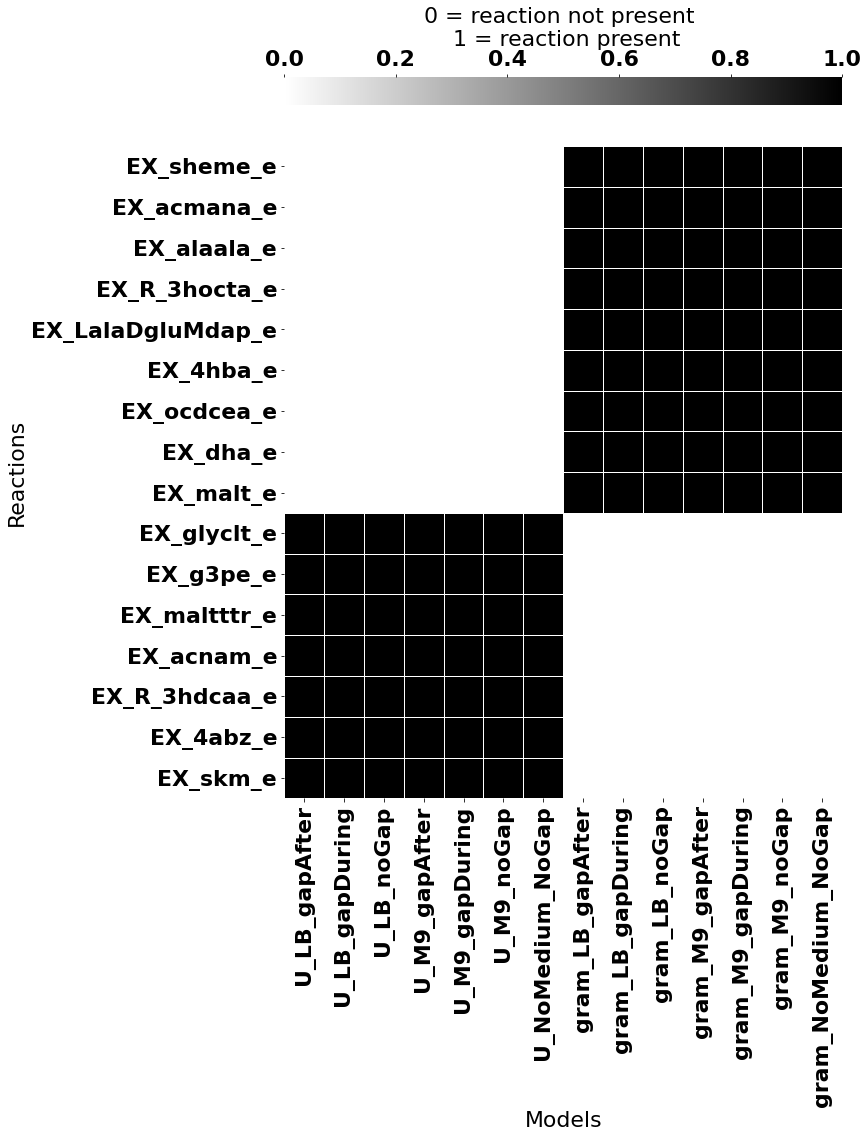

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10,15))

font = {'weight' : 'bold','size'   : 22}

plt.rc('font', **font)

s=sns.heatmap(binarySorted, cmap=plt.get_cmap('binary'), xticklabels=True, yticklabels=True, cbar_kws={'label': '0 = reaction not present \n 1 = reaction present', 'location': 'top'}, linewidths=0.5)

s.set(xlabel='Models', ylabel='Reactions')

plt.savefig('ModelsDiffExRxs.png')

<!-- #### blocked biomass precursors IN MEMOTE, RESULTS ARE DIFFERENT... THEY SAY THEY ADD A TEMPORARY DEMAND REACTION... THAT'S WHAT MAY BE MISSING HERE... -->